In [ ]:
import pandas as pd
import numpy as np 
import scipy as sp
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import scipy.stats as stats

#Importing the necessary libraries  

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
df = pd.read_stata("https://github.com/RJuro/aqm2021/raw/main/assignment_data/CK1994.dta")

#Reading our chosen dataset. We have chosen the second option with minumum wage and employment rate

In [ ]:
df.head()

#Showing the data we have gotten to get an overview of the data.

,store,chain,co_owned,state,southj,centralj,northj,pa1,pa2,shore,ncalls,empft,emppt,nmgrs,wage_st,inctime,firstinc,meals,open,hoursopen,pricesoda,pricefry,priceentree,nregisters,nregisters11,time
0,46.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,30.0,15.0,3.0,NaN,19.0,NaN,2.0,6.5,16.5,1.03,1.03,0.52,3.0,3.0,0.0
1,49.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,6.5,6.5,4.0,NaN,26.0,NaN,2.0,10.0,13.0,1.01,0.90,2.35,4.0,3.0,0.0
2,506.0,2.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,3.0,7.0,2.0,NaN,13.0,0.37,2.0,11.0,10.0,0.95,0.74,2.33,3.0,3.0,0.0
3,56.0,4.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,20.0,20.0,4.0,5.0,26.0,0.10,2.0,10.0,12.0,0.87,0.82,1.79,2.0,2.0,0.0
4,61.0,4.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,6.0,26.0,5.0,5.5,52.0,0.15,3.0,10.0,12.0,0.87,0.77,1.65,2.0,2.0,0.0


In [ ]:
df.info()

#Inspecting our data to see if the dataset is missing any values and how many variables we are working with

<class 'pandas.core.frame.DataFrame'>
Int64Index: 820 entries, 0 to 819
Data columns (total 26 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   store         820 non-null    float32
 1   chain         820 non-null    float32
 2   co_owned      820 non-null    float32
 3   state         820 non-null    float32
 4   southj        820 non-null    float32
 5   centralj      820 non-null    float32
 6   northj        820 non-null    float32
 7   pa1           820 non-null    float32
 8   pa2           820 non-null    float32
 9   shore         820 non-null    float32
 10  ncalls        571 non-null    float32
 11  empft         802 non-null    float32
 12  emppt         806 non-null    float32
 13  nmgrs         808 non-null    float32
 14  wage_st       779 non-null    float32
 15  inctime       723 non-null    float32
 16  firstinc      697 non-null    float32
 17  meals         809 non-null    float32
 18  open          809 non-null    

In [ ]:
df.head(820)

#In the next few code lines, we will attempt to minimize the dataset, so we can focus on the most key variables. 
#Here we will get the full overview of the dataset, as we want to get rid of the "time" variable, so we can divide the dataset up in 2 seperate ones.
#One dataset before the new law and one dataset after the new law
#We will then compare those two datasets against each other and we will be able to see any differences that would have happened.
#As we can see, the time is either "0" or "1" - therefore we will delete the "range" from 410 to 820, as those would have the "1".
#We will keep the "0" in the time variable for this dataset and call it "df_before" in the next code.

,store,chain,co_owned,state,southj,centralj,northj,pa1,pa2,shore,ncalls,empft,emppt,nmgrs,wage_st,inctime,firstinc,meals,open,hoursopen,pricesoda,pricefry,priceentree,nregisters,nregisters11,time
0,46.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,30.0,15.0,3.0,NaN,19.0,NaN,2.0,6.5,16.5,1.03,1.03,0.52,3.0,3.0,0.0
1,49.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,6.5,6.5,4.0,NaN,26.0,NaN,2.0,10.0,13.0,1.01,0.90,2.35,4.0,3.0,0.0
2,506.0,2.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,3.0,7.0,2.0,NaN,13.0,0.37,2.0,11.0,10.0,0.95,0.74,2.33,3.0,3.0,0.0
3,56.0,4.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,20.0,20.0,4.0,5.00,26.0,0.10,2.0,10.0,12.0,0.87,0.82,1.79,2.0,2.0,0.0
4,61.0,4.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,6.0,26.0,5.0,5.50,52.0,0.15,3.0,10.0,12.0,0.87,0.77,1.65,2.0,2.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
815,423.0,2.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,19.0,3.5,3.0,5.25,13.0,0.50,1.0,11.0,11.0,1.05,0.84,2.32,3.0,2.0,1.0
816,424.0,2.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,12.0,3.0,4.0,5.25,19.0,0.50,1.0,11.0,14.0,1.05,0.94,2.32,5.0,3.0,1.0
817,426.0,3.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,NaN,5.0,25.0,3.0,5.05,19.0,0.25,2.0,6.0,18.0,1.11,1.05,1.05,6.0,5.0,1.0
818,427.0,4.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,4.0,0.0,35.0,3.0,5.05,NaN,NaN,2.0,10.5,12.5,1.11,1.09,2.07,2.0,2.0,1.0


In [ ]:
df = df.drop(labels=["store", "southj","centralj","northj","pa1","pa2","shore","ncalls","meals","open","hoursopen","pricesoda","nregisters","nregisters11","time"], axis=1)
# Here we are removing the data that we are not going to use

In [ ]:
cols = ["wage_st", "chain", "co_owned", "state", "empft", "emppt", "nmgrs", "inctime", "firstinc", "pricefry", "priceentree"]
df = df[cols]

In [ ]:
 df_before = df.iloc[:410]
 df_before.info()

 #Here we have deleted the data with the "1" in the variable called "time".
 #Therefore, our new dataset has only the observations from before the law was passed.

<class 'pandas.core.frame.DataFrame'>
Int64Index: 410 entries, 0 to 409
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   wage_st      390 non-null    float32
 1   chain        410 non-null    float32
 2   co_owned     410 non-null    float32
 3   state        410 non-null    float32
 4   empft        404 non-null    float32
 5   emppt        406 non-null    float32
 6   nmgrs        404 non-null    float32
 7   inctime      379 non-null    float32
 8   firstinc     367 non-null    float32
 9   pricefry     393 non-null    float32
 10  priceentree  398 non-null    float32
dtypes: float32(11)
memory usage: 20.8 KB


In [ ]:
df_after = df.iloc[410:]
df_after.info()

# Here we have removed the data from 0 to 409 because we want to show the observation from after the law changing
# It is the colums from 410 to 819 we use to after the law change

<class 'pandas.core.frame.DataFrame'>
Int64Index: 410 entries, 410 to 819
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   wage_st      389 non-null    float32
 1   chain        410 non-null    float32
 2   co_owned     410 non-null    float32
 3   state        410 non-null    float32
 4   empft        398 non-null    float32
 5   emppt        400 non-null    float32
 6   nmgrs        404 non-null    float32
 7   inctime      344 non-null    float32
 8   firstinc     330 non-null    float32
 9   pricefry     382 non-null    float32
 10  priceentree  386 non-null    float32
dtypes: float32(11)
memory usage: 20.8 KB


In [ ]:
df_before = df_before.dropna()
df_after = df_after.dropna()

In [ ]:
df_after = df_after.reset_index()

# Here we reset the index for df_after, as it would otherwise start from 420 to 819.
# We want both datasets index to start from 0-419

In [ ]:
df_after = df_after.drop(labels=["index"], axis=1)

# After we have reseted the index, the dataframe will automatically put the previous index as a label.
# Therefore, we have to delete it and the dataset will look perfectly, as can be seen in the next code.

In [ ]:
df_after.head()

# Here we just show the data for after the law change

,wage_st,chain,co_owned,state,empft,emppt,nmgrs,inctime,firstinc,pricefry,priceentree
0,4.45,2.0,0.0,0.0,0.0,15.0,4.0,13.0,0.05,0.89,2.35
1,5.00,2.0,1.0,0.0,3.0,7.0,4.0,19.0,0.25,0.74,2.33
2,5.25,4.0,1.0,0.0,0.0,36.0,2.0,26.0,0.15,0.79,0.87
3,4.75,4.0,1.0,0.0,28.0,3.0,6.0,13.0,0.15,0.84,0.95
4,4.75,1.0,0.0,0.0,15.0,18.0,5.0,26.0,0.15,0.86,0.94


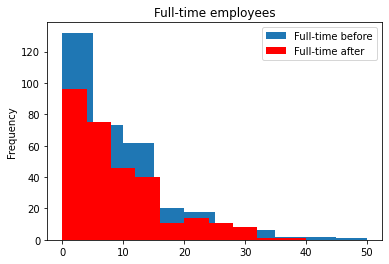

In [ ]:
ax = plt.gca()

df_before.plot(kind='hist',y='empft',ax=ax, title="Full-time employees", label="Full-time before")
df_after.plot(kind='hist',y='empft', color='red', ax=ax, label="Full-time after")

plt.show()

# Here we are comparing the full-time employees before the law changing and after the law changing
# We can see that before the law change there was more full-time employees than after.

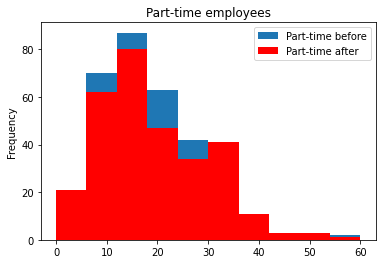

In [ ]:
ax = plt.gca()

df_before.plot(kind='hist',y='emppt',ax=ax, title="Part-time employees", label="Part-time before")
df_after.plot(kind='hist',y='emppt', color='red', ax=ax, label="Part-time after")

plt.show()

# Here we are comparing the part-time employees before the law changing and after the law changing
# We can see that the diffrence between the part-time employees before and after the law change looks almost like the same
# We think the reason to the almost similar curves could be because of the of more of the full-time employees got a job as part-time employees instead of full-time

In [ ]:
df_b_corr = df_before.corr()
df_b_corr

,wage_st,chain,co_owned,state,empft,emppt,nmgrs,inctime,firstinc,pricefry,priceentree
wage_st,1.000000,0.249090,0.142442,-0.064912,0.110874,-0.063261,-0.006431,0.095916,0.057476,0.052664,0.053714
chain,0.249090,1.000000,0.236302,-0.109619,-0.018409,0.014201,-0.102248,0.011012,-0.075919,0.038051,0.074494
co_owned,0.142442,0.236302,1.000000,-0.082142,-0.078713,-0.075810,-0.053824,0.019625,-0.012915,-0.018176,0.093267
state,-0.064912,-0.109619,-0.082142,1.000000,-0.077918,-0.089431,-0.085411,-0.072531,0.079579,0.386584,0.091660
empft,0.110874,-0.018409,-0.078713,-0.077918,1.000000,-0.167984,0.135316,0.006238,0.083051,0.063311,-0.196053
emppt,-0.063261,0.014201,-0.075810,-0.089431,-0.167984,1.000000,0.237749,0.103860,-0.067357,0.055762,-0.355342
nmgrs,-0.006431,-0.102248,-0.053824,-0.085411,0.135316,0.237749,1.000000,0.003808,0.066314,-0.012316,-0.170596
inctime,0.095916,0.011012,0.019625,-0.072531,0.006238,0.103860,0.003808,1.000000,-0.063042,-0.032480,-0.103237
firstinc,0.057476,-0.075919,-0.012915,0.079579,0.083051,-0.067357,0.066314,-0.063042,1.000000,0.205416,0.007792
pricefry,0.052664,0.038051,-0.018176,0.386584,0.063311,0.055762,-0.012316,-0.032480,0.205416,1.000000,-0.125132


In [ ]:
df_a_corr = df_after.corr()
df_a_corr

,wage_st,chain,co_owned,state,empft,emppt,nmgrs,inctime,firstinc,pricefry,priceentree
wage_st,1.000000,0.005510,0.040834,0.675683,0.053412,-0.056884,-0.090022,0.049018,0.244804,0.189267,0.106887
chain,0.005510,1.000000,0.252511,-0.004928,-0.162145,0.033089,-0.120060,0.068523,-0.091615,0.112207,0.152234
co_owned,0.040834,0.252511,1.000000,-0.021022,-0.098067,-0.124925,-0.085686,-0.005822,0.034458,0.114785,0.107292
state,0.675683,-0.004928,-0.021022,1.000000,0.020206,-0.026104,-0.086044,0.050364,0.135342,0.351803,0.127892
empft,0.053412,-0.162145,-0.098067,0.020206,1.000000,-0.252791,0.187529,-0.079141,0.121361,0.066396,-0.162404
emppt,-0.056884,0.033089,-0.124925,-0.026104,-0.252791,1.000000,0.231077,0.187622,-0.168276,0.067526,-0.363524
nmgrs,-0.090022,-0.120060,-0.085686,-0.086044,0.187529,0.231077,1.000000,-0.018754,0.097722,0.050456,-0.183063
inctime,0.049018,0.068523,-0.005822,0.050364,-0.079141,0.187622,-0.018754,1.000000,-0.063255,0.063780,-0.068366
firstinc,0.244804,-0.091615,0.034458,0.135342,0.121361,-0.168276,0.097722,-0.063255,1.000000,-0.000016,0.197460
pricefry,0.189267,0.112207,0.114785,0.351803,0.066396,0.067526,0.050456,0.063780,-0.000016,1.000000,-0.214292


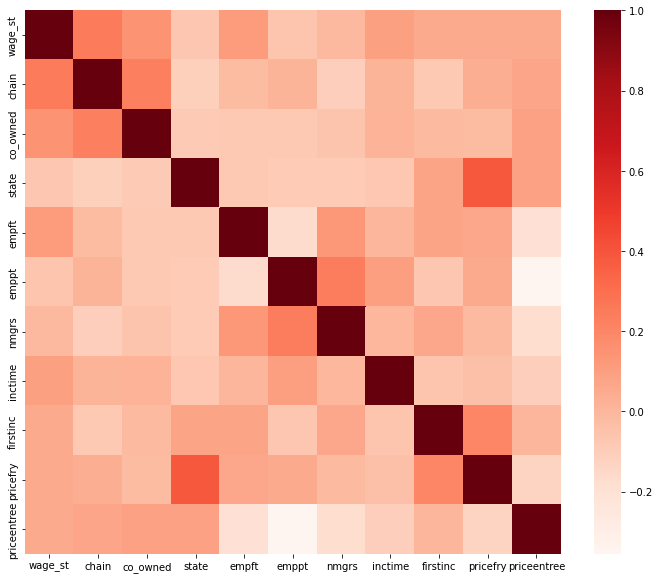

In [ ]:
plt.figure(figsize=(12,10))
sns.heatmap(df_b_corr, cmap='Reds')

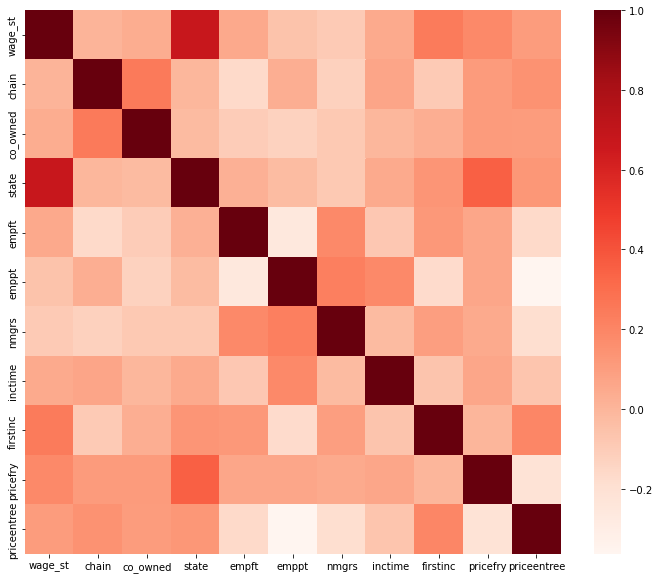

In [ ]:
plt.figure(figsize=(12,10))
sns.heatmap(df_a_corr, cmap='Reds')

In [ ]:
X = df_before.iloc[:, 1:]

In [ ]:
y = df_before["wage_st"]

In [ ]:
X = sm.add_constant(X)

In [ ]:
model = sm.OLS(y, X)

In [ ]:
results_before = model.fit()

In [ ]:
results_before.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                wage_st   R-squared:                       0.106
Model:                            OLS   Adj. R-squared:                  0.077
Method:                 Least Squares   F-statistic:                     3.678
Date:                Tue, 23 Nov 2021   Prob (F-statistic):           0.000116
Time:                        10:54:11   Log-Likelihood:                -92.371
No. Observations:                 321   AIC:                             206.7
Df Residuals:                     310   BIC:                             248.2
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           4.1218      0.198     20.788      0.000       3.732       4.512
chain           0.0683      0.017      3.964      0.000       0.034       0.102
co_owned        0.0614      0.040      1.540      0.125      -0.017       0.140
state          -0.0457      0.052     -0.875      0.382      -0.148       0.057
empft           0.0048      0.002      1.924      0.055      -0.000       0.010
emppt          -0.0014      0.002     -0.606      0.545      -0.006       0.003
nmgrs           0.0060      0.020      0.307      0.759      -0.032       0.044
inctime         0.0032      0.002      1.901      0.058      -0.000       0.007
firstinc        0.1975      0.182      1.087      0.278      -0.160       0.555
pricefry        0.1924      0.195      0.987      0.324      -0.191       0.576
priceentree     0.0339      0.033      1.037      0.300      -0.030       0.098
==============================================================================
Omnibus:                       15.414   Durbin-Watson:                   0.713
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               16.260
Skew:                           0.527   Prob(JB):                     0.000295
Kurtosis:                       2.674   Cond. No.                         419.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

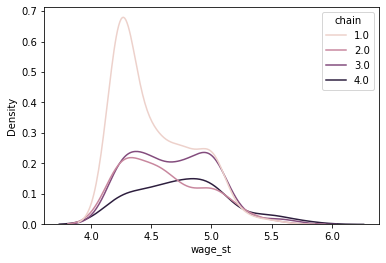

In [ ]:
sns.kdeplot(data=df_before, x='wage_st', hue='chain')

In [ ]:
df.groupby("chain").wage_st.var()

chain
1.0    0.142795
2.0    0.118656
3.0    0.098277
4.0    0.138850
Name: wage_st, dtype: float32

In [ ]:
#LIGE HER#
f_value, p_value = sp.stats.f_oneway(df_before['wage_st'][df_before['chain'] == 1],
                                     df_before['wage_st'][df_before['chain'] == 2],
                                     df_before['wage_st'][df_before['chain'] == 3],
                                     df_before['wage_st'][df_before['chain'] == 4])

In [ ]:
print(f"The f-value of our One-Way ANOVA is: {f_value}")

The f-value of our One-Way ANOVA is: 6.992649286269851


In [ ]:
X_1 = df_after.iloc[:, 1:]
y_1 = df_after["wage_st"]
X_1 = sm.add_constant(X_1)
model_1 = sm.OLS(y_1, X_1)
results_after = model_1.fit()
results_after.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                wage_st   R-squared:                       0.491
Model:                            OLS   Adj. R-squared:                  0.473
Method:                 Least Squares   F-statistic:                     28.14
Date:                Tue, 23 Nov 2021   Prob (F-statistic):           1.95e-37
Time:                        10:54:11   Log-Likelihood:                 86.110
No. Observations:                 303   AIC:                            -150.2
Df Residuals:                     292   BIC:                            -109.4
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           4.7288      0.116     40.864      0.000       4.501       4.957
chain           0.0049      0.011      0.465      0.642      -0.016       0.026
co_owned        0.0299      0.024      1.259      0.209      -0.017       0.077
state           0.4332      0.030     14.477      0.000       0.374       0.492
empft           0.0013      0.002      0.853      0.394      -0.002       0.004
emppt        7.173e-05      0.001      0.058      0.954      -0.002       0.003
nmgrs          -0.0121      0.011     -1.126      0.261      -0.033       0.009
inctime         0.0005      0.001      0.647      0.518      -0.001       0.002
firstinc        0.3922      0.107      3.678      0.000       0.182       0.602
pricefry       -0.1563      0.111     -1.403      0.162      -0.376       0.063
priceentree    -0.0137      0.020     -0.697      0.486      -0.053       0.025
==============================================================================
Omnibus:                      184.722   Durbin-Watson:                   1.851
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3123.912
Skew:                           2.131   Prob(JB):                         0.00
Kurtosis:                      18.142   Cond. No.                         472.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
X_2 = df_after[["state", "firstinc"]]
model_2 = sm.OLS(y_1, X_2)
results_2 = model_2.fit()
results_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                wage_st   R-squared (uncentered):                   0.897
Model:                            OLS   Adj. R-squared (uncentered):              0.896
Method:                 Least Squares   F-statistic:                              1312.
Date:                Tue, 23 Nov 2021   Prob (F-statistic):                   2.45e-149
Time:                        10:54:11   Log-Likelihood:                         -573.39
No. Observations:                 303   AIC:                                      1151.
Df Residuals:                     301   BIC:                                      1158.
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
state          2.8836      0.186     15.529      0.000       2.518       3.249
firstinc       9.8532      0.691     14.257      0.000       8.493      11.213
==============================================================================
Omnibus:                       31.701   Durbin-Watson:                   0.729
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              102.204
Skew:                          -0.388   Prob(JB):                     6.41e-23
Kurtosis:                       5.738   Cond. No.                         7.03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""